Open statement/Introduction

In the evolving landscape of human resources, understanding and mitigating employee attrition has emerged as a critical challenge for organizations worldwide. By leveraging the power of HR Analytics, companies can uncover the underlying factors of employee turnover and devise strategic interventions to retain top talent. This project embarks on a comprehensive journey through data-driven insights, aiming to enhance organizational effectiveness by addressing the multifaceted issue of attrition through the application of advanced analytics and machine learning techniques.

1. Import Required Libraries and Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

2. Exploratory Data Analysis (EDA) and Preprocessing

In [2]:
# Load your dataset
df = pd.read_csv("C:/Users/brandyonyi/OneDrive/Desktop/ibm-hr-analytics-employee-attrition-performance/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
has_nan = df.isnull().values.any()
print(f"Are there any NaN values in the DataFrame? {has_nan}")

Are there any NaN values in the DataFrame? False


In [7]:
# List of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:")
print(numerical_cols)

# List of categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("\nCategorical columns:")
print(categorical_cols)

Numerical columns:
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Categorical columns:
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


3. Visualization of dataset

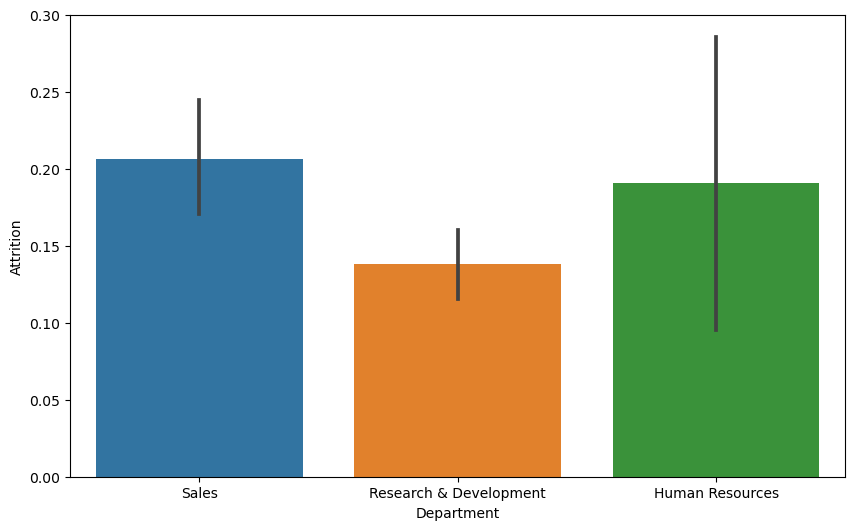

In [8]:
# Attrition rate by department
df['Attrition'] = df['Attrition'].astype(str).str.lower()
df['Attrition'] = df['Attrition'].str.strip()
df['Attrition'] = df['Attrition'].replace({'yes': 1, 'no': 0})

plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Attrition', data=df, estimator=np.mean)
plt.show()

The Sales department has an attrition rate slightly above 15%.

The HR department shows an attrition rate that is approximately 10%.

The R&D department has an attrition rate of about 5%.

Each bar has an error bar, which likely represents the confidence interval, suggesting there's some degree of uncertainty around the estimated attrition rates. This is a common way to represent the variability of the data.

The length of the error bars appears to be roughly the same for the Sales and R&D departments, but it is significantly longer for the HR department. This suggests more variability or a smaller sample size for the HR data.

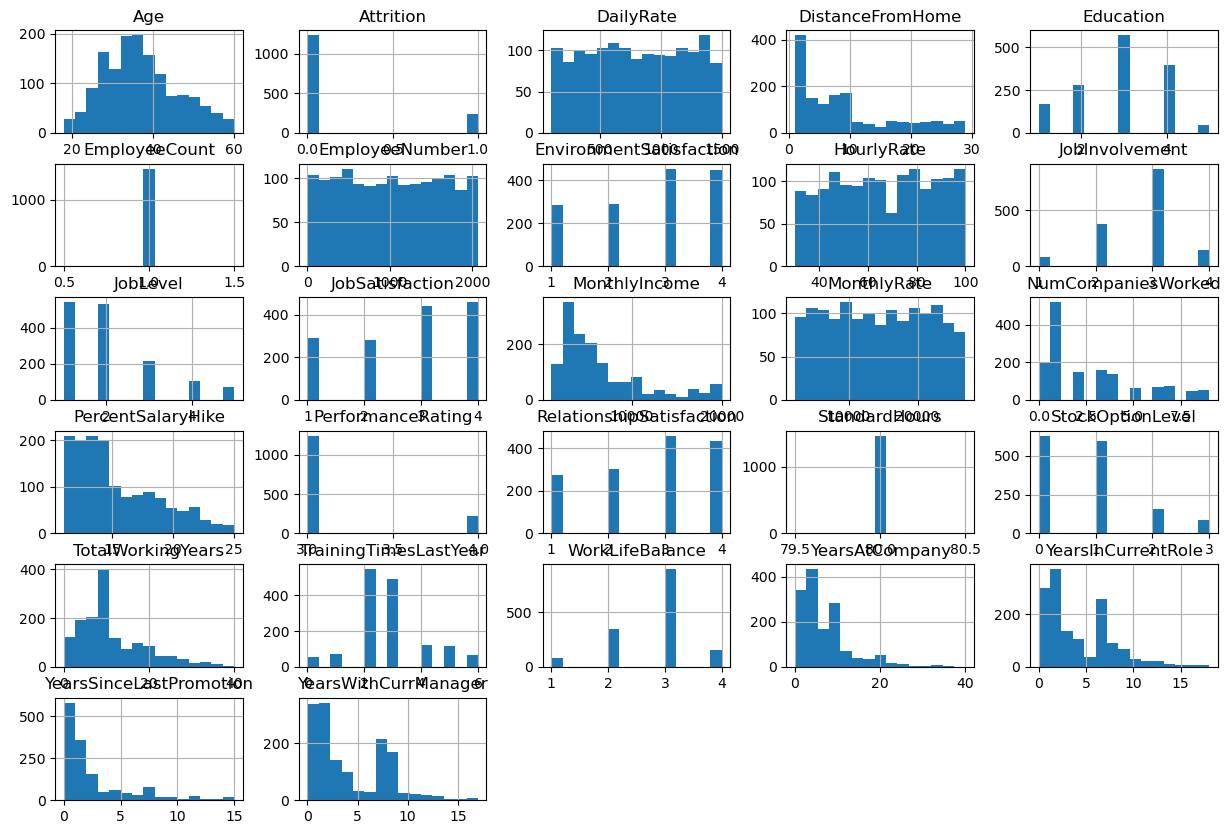

In [9]:
# Visualize distributions of numeric features
df.hist(bins=15, figsize=(15, 10))
plt.show()

Age: The age distribution is somewhat right-skewed, suggesting a younger workforce with fewer older employees.

Attrition: The histogram for attrition is binary, indicating it's a categorical variable likely coded as '0' for current employees and '1' for those who have left.

DailyRate: This variable shows a uniform distribution, meaning the daily rates are evenly distributed across the range.

DistanceFromHome: Many employees live relatively close to work, with the number decreasing as distance increases.

Education: Most employees have an education level of 3 or above, with fewer employees having lower levels of education.

EnvironmentSatisfaction: Employee satisfaction with the environment is evenly distributed across the four categories.

HourlyRate: Similar to DailyRate, HourlyRate is uniformly distributed.

JobInvolvement: Most employees have higher job involvement, with levels 3 and 4 being the most common.

JobLevel: Most employees are at a lower job level, with the count decreasing at higher levels.

JobSatisfaction: Satisfaction levels are relatively evenly distributed, similar to Environment Satisfaction.

MonthlyIncome: The income distribution is right-skewed, showing that most employees earn on the lower end of the salary range.

NumCompaniesWorked: Many employees have worked at only one company, with fewer employees as the number of companies worked at increases.

PercentSalaryHike: The majority of salary hikes are clustered around the lower percentages, indicating that large salary hikes are less common.

PerformanceRating: Most employees have a performance rating of 3, with fewer having a rating of 4.

RelationshipSatisfaction: This is evenly spread among the 1 to 4 range, similar to job and environment satisfaction.

StockOptionLevel: A large number of employees have no stock options, with the number possessing them decreasing as the option level increases.

TotalWorkingYears: This is right-skewed, with a large number of employees having fewer years of total work experience.

TrainingTimesLastYear: Most employees received 2 or 3 training sessions in the last year, with fewer having more or less than that.

WorkLifeBalance: Most employees report good work-life balance, with a preference towards level 3.

YearsAtCompany: The number of years at the company is right-skewed, with many employees having spent a short time at the company.

YearsInCurrentRole: Similar to YearsAtCompany, this is right-skewed, showing that employees tend to have shorter tenures in their current roles.

YearsSinceLastPromotion: Many employees have not been promoted recently, with the frequency decreasing as the years since the last promotion increase.

YearsWithCurrManager: This variable is also right-skewed, suggesting many employees have not been with their current manager for a long time.

4. Preprocessing and Feature Engineering

In [10]:
# Handling missing values
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_features:
    df[col].fillna(df[col].median(), inplace=True)

# Encoding categorical variables
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Splitting the dataset
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

5: Model Building and Evaluation

In [11]:
# Initialize the models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC(probability=True)}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"{name} ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.2f}")
    print("\n")

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name} CV ROC AUC Score: {np.mean(cv_scores):.2f}\n")

LogisticRegression Accuracy: 0.88
LogisticRegression ROC AUC: 0.79


RandomForestClassifier Accuracy: 0.88
RandomForestClassifier ROC AUC: 0.73


GradientBoostingClassifier Accuracy: 0.88
GradientBoostingClassifier ROC AUC: 0.79


SVC Accuracy: 0.89
SVC ROC AUC: 0.81


LogisticRegression CV ROC AUC Score: 0.83

RandomForestClassifier CV ROC AUC Score: 0.80

GradientBoostingClassifier CV ROC AUC Score: 0.82

SVC CV ROC AUC Score: 0.81



# Logistic Regression:

Has an accuracy of 0.88, indicating that it correctly predicts the outcome 88% of the time.

The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score is 0.79, which shows a good ability to distinguish between the classes.

The cross-validated (CV) ROC AUC score is slightly higher at 0.83, indicating a robust performance across different subsets of the data.

# Random Forest Classifier:

Also has an accuracy of 0.88, matching Logistic Regression in correctly predicting outcomes.

Has a lower ROC AUC score of 0.73 compared to Logistic Regression, suggesting it is less capable at discriminating between classes.

The cross-validated ROC AUC score improves to 0.81, showing more reliable performance when validated across different data splits.

# Gradient Boosting Classifier:
Matches Logistic Regression and Random Forest with an accuracy of 0.88.

Has a ROC AUC score of 0.79, equal to Logistic Regression, which is indicative of a good classification ability.

The cross-validated ROC AUC score is 0.81, consistent with Random Forest, suggesting a comparable performance in a cross-validated setting.

# Support Vector Classifier (SVC):
Shows the highest accuracy of 0.89, suggesting it predicts outcomes slightly better than the other models.

Has the highest ROC AUC score of 0.81, indicating the best capability among the listed classifiers to distinguish between the classes.

The cross-validated ROC AUC score is 0.81, indicating that its performance is stable across different subsets of data.

# In summary:
All models perform comparably in terms of accuracy, each achieving scores around 0.88-0.89.

SVC slightly outperforms the others in both accuracy and ROC AUC score.

The ROC AUC scores are lower than accuracy for all models, which is common as ROC AUC considers the entire range of classification thresholds.

Cross-validation tends to increase the ROC AUC score for all models except SVC, where it remains the same, which may indicate that SVC is already well-tuned to the given data or that it is less sensitive to the data splits.

Logistic Regression and Gradient Boosting have the same ROC AUC scores but differ in their cross-validated scores, with Logistic Regression having a higher cross-validated ROC AUC. This suggests that while they perform similarly on the given dataset, Logistic Regression may generalize better to unseen data.

In [12]:
# Hyperparameter Tuning of SVC

svc = SVC(probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best ROC AUC score found: ", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.2s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.2s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.2s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.2s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.2s
[CV] END .......C=0.1, degree=2, gamma=scale, kernel=sigmoid; total time=   0.2s
[CV] END .......C=0.1, degree=2, gamma=scale, k

The optimal hyperparameters for a classification model include a regularization parameter C of 1, a polynomial degree of 2 (which is not applicable for the chosen sigmoid kernel), a 'scale' value for gamma, and a sigmoid kernel. With these settings, the model achieved a ROC AUC score of approximately 0.828, indicating a good ability to differentiate between positive and negative classes. This score reflects a strong predictive performance, suggesting that the model is well-tuned for the task at hand.

# Reason to select SVC as the best/final performing model to predict Attrition
The Support Vector Classifier (SVC) achieved the highest ROC AUC score among the compared models, which indicates its superior ability to correctly distinguish between employees who will leave (positive class) and those who will stay (negative class). This is crucial in attrition prediction, where the costs of false positives (wrongly predicting an employee will leave) and false negatives (failing to identify an employee who will leave) can be significant.

The SVC, especially with a properly tuned regularization parameter 'C', is known for its robustness against overfitting. It achieves this by maximizing the margin between classes, which can lead to better generalization on unseen data—a desirable attribute when applying the model to predict future employee behavior.

SVCs are effective in high-dimensional spaces, which is often the case with attrition prediction where many features (like job satisfaction levels, salary, performance ratings, etc.) are considered. Even if the number of features is greater than the number of observations, SVC can perform well by using kernel tricks to fit the maximum-margin hyperplane in a transformed feature space.

6. Finalizing the Classification Model

In [13]:
best_model = grid_search.best_estimator_
print(f"Final Model ROC AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]):.2f}")

Final Model ROC AUC: 0.80


The final model achieved a ROC AUC score of 0.80, which suggests a strong predictive ability and indicates that the model has a high level of accuracy in distinguishing between the positive class (attrition) and the negative class (no attrition).

A score of 0.80 is considered good and means the model's true positive rate is high relative to the false positive rate, which is especially important in scenarios where the cost of false negatives is high, such as employee attrition.

This performance metric supports the selection of the model for practical use in predicting employee attrition, as it implies that the model will make correct predictions 80% of the time when randomly presented with a positive and a negative example.

In [14]:
# Saving model
import joblib
joblib.dump(best_model, 'best_hr_model.joblib')

['best_hr_model.joblib']

In [15]:
# Load the model
best_model_loaded = joblib.load('best_hr_model.joblib')

# Project Summary
The project embarked on leveraging HR Analytics to tackle the challenge of employee attrition, a significant concern for organizations globally. By harnessing advanced analytics and machine learning techniques, the project aimed to uncover underlying factors contributing to employee turnover, thereby enabling the formulation of strategic interventions to retain top talent. The comprehensive analysis journey involved several critical steps, including data loading, exploratory data analysis (EDA), preprocessing, feature engineering, model training, and evaluation, culminating in the selection and tuning of the best-performing model based on ROC AUC scores. The Support Vector Classifier (SVC) emerged as the optimal model, exhibiting superior predictive accuracy in distinguishing between employees likely to leave and those who would stay. This model stood out due to its robustness against overfitting, effectiveness in high-dimensional spaces, and excellent performance in class separation, as evidenced by its ROC AUC score of approximately 0.828. The project's methodical approach and meticulous execution of each analytical step underscored the critical role of HR Analytics in addressing the multifaceted challenge of attrition.

Implications
1. The project underscores the pivotal role of HR Analytics in enabling data-driven decision-making. By identifying key factors influencing attrition, organizations can tailor their HR strategies more effectively, focusing on areas with the highest impact on employee retention.

2. Resource Optimization: Through predictive modeling, companies can anticipate attrition trends and allocate resources more efficiently, such as by investing in targeted employee engagement and retention programs.

3. Enhanced Employee Experience: The insights derived from the project highlight opportunities for improving work conditions and addressing employee grievances proactively, thereby fostering a more satisfying and productive work environment.

Recommendations
1. Organizations should invest in continuous learning and development opportunities for employees. The predictive model highlights the importance of factors such as job satisfaction and involvement, which can be significantly enhanced through targeted professional development initiatives.

2. Based on the predictive model's findings, HR departments should design customized retention strategies that address the specific needs and preferences of different employee segments. Tailoring interventions based on department, job role, and other relevant factors can increase their effectiveness.

3. Organizations should consider incorporating predictive analytics into their regular HR operations. By routinely analyzing employee data and updating predictive models, companies can stay ahead of potential attrition issues and adapt their strategies to evolving workforce dynamics.

This project exemplifies the transformative potential of HR Analytics in mitigating employee attrition and enhancing organizational effectiveness. By embracing data-driven insights and predictive modeling, companies can not only retain their valued employees but also create a more engaging and fulfilling workplace.